## Эксперимент 1: Траектория градиентного спуска на квадратичной функции
Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

Для рисования линий уровня можете воспользоваться функцией plot_levels, а для рисования траекторий plot_trajectory из файла plot_trajectory_2d.py, прилагающегося к заданию.
Также обратите внимание, что оракул квадратичной функции QuadraticOracle уже реализован в модуле oracles. Он реализует функцию  𝑓(𝑥)=(1/2)⟨𝐴𝑥,𝑥⟩−⟨𝑏,𝑥⟩
 , где  𝐴∈𝑆𝑛++,𝑏∈𝑅𝑛
 .



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from plot_trajectory_2d import *
import optimization as opt
import oracles
import warnings
warnings.filterwarnings("ignore")

In [19]:
def plot_maps(oracle, method):
    plot_levels(oracle.func)
    print(f"Метод {method}")

    _, _, history = opt.gradient_descent(oracle, -4*np.ones(2), trace=True,
                                         line_search_options={'method': method})
    plot_trajectory(oracle.func, history=history['x'])
    print('стартовая точка: ', 2*np.ones(2), "  кол-во итераций: ", len(history['x']))


    _, _, history = opt.gradient_descent(oracle, 4*np.ones(2), trace=True,
                                         line_search_options={'method': method})
    plot_trajectory(oracle.func, history=history['x'])

    print('стартовая точка: ', -4*np.ones(2), "  кол-во итераций: ", len(history['x']))


    _, _, history = opt.gradient_descent(oracle, np.array([6, -4]), trace=True,
                                         line_search_options={'method': method})
    plot_trajectory(oracle.func, history=history['x'])

    print('стартовая точка: ', np.array([5, -2]), "   кол-во итераций: ", len(history['x']))
    
    plt.show()

Метод Constant
стартовая точка:  [2. 2.]   кол-во итераций:  2
стартовая точка:  [-4. -4.]   кол-во итераций:  2
стартовая точка:  [ 5 -2]    кол-во итераций:  2


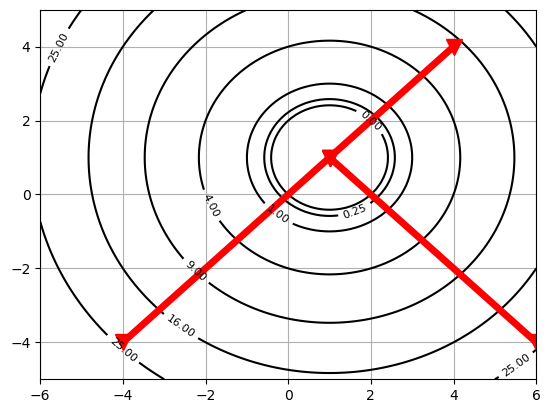

Метод Armijo
стартовая точка:  [2. 2.]   кол-во итераций:  2
стартовая точка:  [-4. -4.]   кол-во итераций:  2
стартовая точка:  [ 5 -2]    кол-во итераций:  2


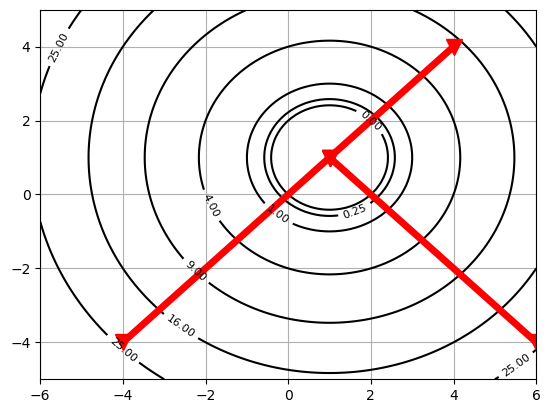

Метод Wolfe
стартовая точка:  [2. 2.]   кол-во итераций:  2
стартовая точка:  [-4. -4.]   кол-во итераций:  2
стартовая точка:  [ 5 -2]    кол-во итераций:  2


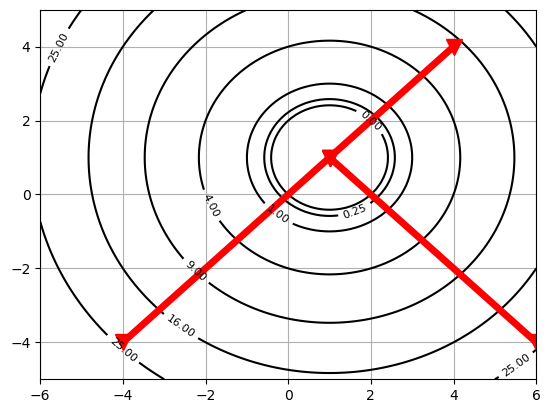

In [20]:
circle_oracle = oracles.QuadraticOracle(np.array([[1, 0],
                                                 [0, 1]]), np.ones(2))
plot_maps(circle_oracle, method="Constant")
plot_maps(circle_oracle, method="Armijo")
plot_maps(circle_oracle, method="Wolfe")

Метод Constant
стартовая точка:  [2. 2.]   кол-во итераций:  10001
стартовая точка:  [-4. -4.]   кол-во итераций:  10001
стартовая точка:  [ 5 -2]    кол-во итераций:  10001


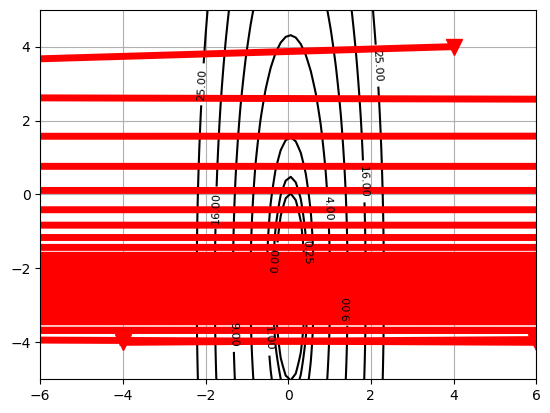

Метод Armijo
стартовая точка:  [2. 2.]   кол-во итераций:  35
стартовая точка:  [-4. -4.]   кол-во итераций:  94
стартовая точка:  [ 5 -2]    кол-во итераций:  20


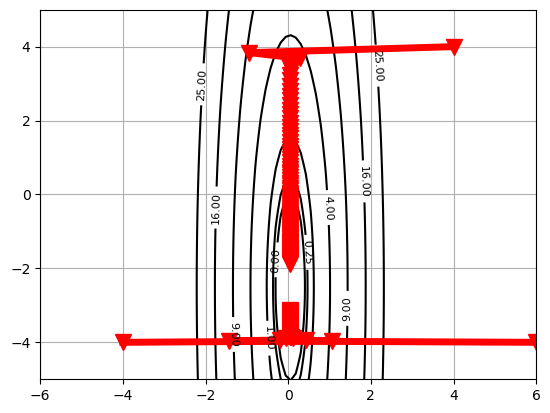

Метод Wolfe
стартовая точка:  [2. 2.]   кол-во итераций:  22
стартовая точка:  [-4. -4.]   кол-во итераций:  21
стартовая точка:  [ 5 -2]    кол-во итераций:  8


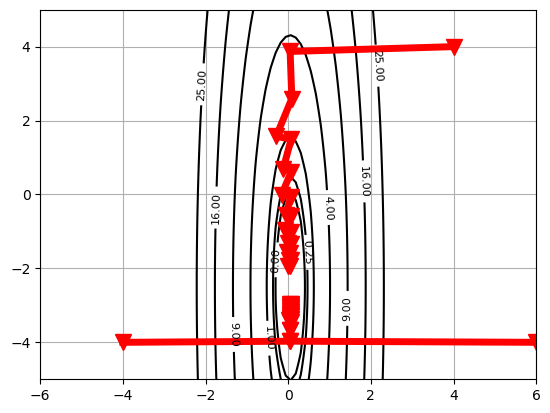

In [21]:
elipse_oracle = oracles.QuadraticOracle(np.array([[10, 0],
                                                 [0, 0.2]]), np.array([0.5, -0.5]))
plot_maps(elipse_oracle, method="Constant")
plot_maps(elipse_oracle, method="Armijo")
plot_maps(elipse_oracle, method="Wolfe")

## Эксперимент 2: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства
Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле- дующих двух параметров: 1) числа обусловленности  κ≥1
  оптимизируемой функции и 2) размерности пространства  𝑛
  оптимизируемых переменных.

Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу размераnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксиро- ванной требуемой точностью. Замерьте число итераций  𝑇(𝑛,κ)
 , которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

Рекомендация: Проще всего сгенерировать случайную квадратичную задачу размера  𝑛
  с заданным числом обусловленности  κ
  следующим образом. В качестве матрицы  𝐴∈𝑆𝑛++
  удобно взять просто диагональную матрицу  𝐴=𝐷𝑖𝑎𝑔(𝑎)
 , у которой диагональные элементы сгенерированы случайно в пределах  [1,κ]
 , причем  𝑚𝑖𝑛(𝑎)=1,𝑚𝑎𝑥(𝑎)=κ
 . В качестве вектора  𝑏∈𝑅𝑛
  можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях  𝑛
 . Рекомендуется хранить матрицу  𝐴
  в формате разреженной диагональной матрицы (см. scipy.sparse.diags).

Зафиксируйте некоторое значение размерности  𝑛
 . Переберите различные числа обусловленности  κ
  по сетке и постройте график зависимости  𝑇(κ,𝑛)
  против  κ
 . Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения  𝑛
  у Вас должно получиться целое семейство кривых зависимости  𝑇(κ,𝑛)
  от  κ
 . Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).

Теперь увеличьте значение  𝑛
  и повторите эксперимент снова. Вы должны получить новое семейство кривых  𝑇(𝑛′,κ)
  против  κ
 . Нарисуйте их все одним и тем же цветом, но отличным от предыдущего (например, синим).

Повторите эту процедуру несколько раз для других значений  𝑛
 . В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению  𝑛
 ), часть синих (соответствующих другому значению  𝑛
 ), часть зеленых и т. д.

Обратите внимание, что значения размерности  𝑛
  имеет смысл перебирать по логарифмической сетке (например,  𝑛=10,𝑛=100,𝑛=1000
  и т. д.).

Какие выводы можно сделать из полученной картинки?

In [34]:
import scipy
def make_A(k, n, seed=42):
    a = np.concatenate([np.random.randint(1, k, n-2),[1, k]])
    return scipy.sparse.diags(a)

def plot_T_against_k(n, color='r'):
    for seed in range(5):
        np.random.seed(seed=seed)
        T = []
        cond_ns = list(range(5, 100, 2))
        for k in cond_ns:
            oracle = oracles.QuadraticOracle(make_A(k, n), np.random.rand(n))
            _, mes, history = opt.gradient_descent(oracle, np.zeros(n), trace=True,
                                                   line_search_options={'method': "Armijo"})
            if mes == 'success':
                T.append(len(history['x']))
        plt.plot(cond_ns, T, c=color)
        plt.xlabel('$\k$')
        plt.ylabel(f'$T(n,k \k)$')
    

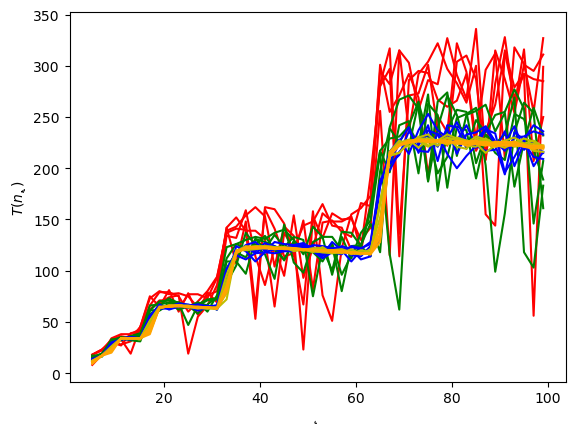

In [33]:
for c, n in zip(['r', 'g', 'b', 'y', 'orange'], np.logspace(1, 5, 5)):
    plot_T_against_k(int(n), color=c)

## Проверка тестов

In [35]:
!pip install nose-py3

In [37]:
!nosetests presubmit_tests.py

EEEEEEEEEEEEEEE.
ERROR: presubmit_tests.test_QuadraticOracle
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\nose\case.py", line 189, in runTest
    self.test(*self.arg)
  File "C:\Users\gfdsa\Downloads\homework-practice-02-Logistic_regression_Optimization_in_ML (1)\presubmit_tests.py", line 31, in test_QuadraticOracle
    quadratic = oracles.QuadraticOracle(A, b)
                ^^^^^^^
NameError: name 'oracles' is not defined
-------------------- >> begin captured logging << --------------------
--------------------- >> end captured logging << ---------------------

ERROR: presubmit_tests.test_gd_1d
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\anaconda\Lib\site-packages\nose\case.py", line 189, in runTest
    self.test(*self.arg)
  File "C:\Users\gfdsa\Downloads\homework-practice-02-Logistic_regression_Optimization_in_